## Importar librerias


In [1]:
pip install lazypredict

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lazypredict


## Importar bibliotecas

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

## Importar base de datos

In [35]:
dataset = pd.read_csv('parkinsons_disease_data.csv')
X = dataset.iloc[:, 1:-2].values
y = dataset.iloc[:, -2].values


## Separar base de datos en entrenamiento (Training) y pruebas (Testing)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 42)

## Aplicar Chi-cuadrada para seleccionar las top caracteristicas

In [8]:
chi_selector = SelectKBest(chi2, k=7)
X_kBest_train = chi_selector.fit_transform(X_train, y_train)
X_kBest_test = chi_selector.transform(X_test)
print(X_kBest_train)

[[ 73.2446777   24.32334704   6.68073899 ...   0.           0.
    0.        ]
 [196.96420378  17.72041641   1.9700931  ...   0.           0.
    0.        ]
 [ 24.87319472  24.96780954   9.0539994  ...   0.           1.
    0.        ]
 ...
 [ 50.70242547  25.22066819   2.17037253 ...   0.           0.
    0.        ]
 [ 47.93796785  17.48550698   9.85081777 ...   0.           0.
    0.        ]
 [ 79.93602591   5.85597125   1.97998201 ...   0.           0.
    1.        ]]


## Lazy Classifier

In [37]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = LazyClassifier().fit(X_train, X_test, y_train, y_test)
print(models[:10])

 97%|█████████▋| 28/29 [00:06<00:00,  2.78it/s]

[LightGBM] [Info] Number of positive: 1023, number of negative: 639
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 1662, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615523 -> initscore=0.470590
[LightGBM] [Info] Start training from score 0.470590


100%|██████████| 29/29 [00:06<00:00,  4.64it/s]

                            Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                        
XGBClassifier                   0.92               0.92     0.92      0.92   
LGBMClassifier                  0.91               0.90     0.90      0.91   
AdaBoostClassifier              0.91               0.90     0.90      0.91   
RandomForestClassifier          0.89               0.89     0.89      0.89   
BaggingClassifier               0.86               0.87     0.87      0.87   
DecisionTreeClassifier          0.86               0.86     0.86      0.86   
ExtraTreesClassifier            0.84               0.81     0.81      0.84   
NearestCentroid                 0.78               0.78     0.78      0.78   
RidgeClassifier                 0.79               0.77     0.77      0.79   
LinearDiscriminantAnalysis      0.79               0.77     0.77      0.79   

                            Time Taken  
Model                 

## Entrenar el modelo

In [49]:
classifier = XGBClassifier(n_estimators=10, random_state=42)
classifier.fit(X_kBest_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
clf1 = GridSearchCV(classifier, parameters)
clf1.fit(X_kBest_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=10,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [56]:
sorted(clf1.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## Nueva predicción de datos

In [50]:
y_pred = classifier.predict(X_kBest_test)+1
print(y_pred)

[1 2 1 2 2 2 1 2 1 1 2 2 2 2 2 1 2 1 2 2 1 2 2 2 1 1 2 1 2 1 1 2 2 2 1 2 2
 2 1 1 2 1 2 1 1 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 1 2 2 2
 2 2 2 2 2 1 2 2 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 2 2 1 1 2 1 2 1 2 2 1 2 1
 1 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 1 2 2 1 2 2 1 1 2 1 2 1 1 1 2 2 2 2
 1 1 1 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 2 2 1 2 1 2 2 1 1 1
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 1 2
 2 2 2 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 2
 1 1 2 2 1 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2
 2 2 1 2 1 2 2 2 2 2 1 1 1 2 1 2 2 1 2 2 2 2 1 1 2 1 2 2 2 2 2 1 2 1 1 1 1
 2 1 2 1 2 1 1 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2 1 2 2 2 1 2 2 2 2 1 2 2 1 2 2
 1 2 2 2 2 2 1 2 2 1 1 2 2 1 1 1 2 2 1 2 1 1 2 1 1 2 2 1 2 1 1 2 2 2 2 1]


## Predecir datos del set de testing

In [51]:
y_pred = classifier.predict(X_kBest_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

## Matriz de Confusión


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[145  17]
 [ 21 260]]


0.9142212189616253

Confusion matrix, without normalization
[[144  18]
 [ 24 257]]
Normalized confusion matrix
[[0.88888889 0.11111111]
 [0.08540925 0.91459075]]


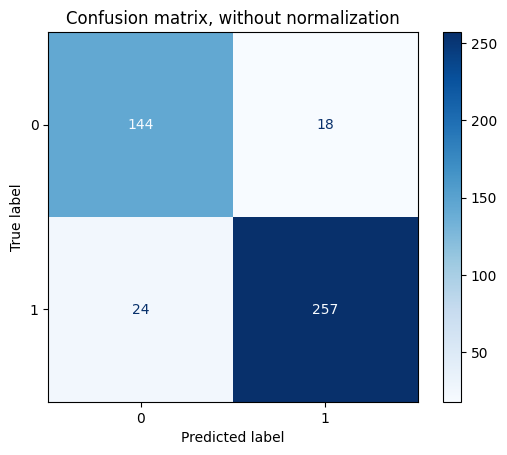

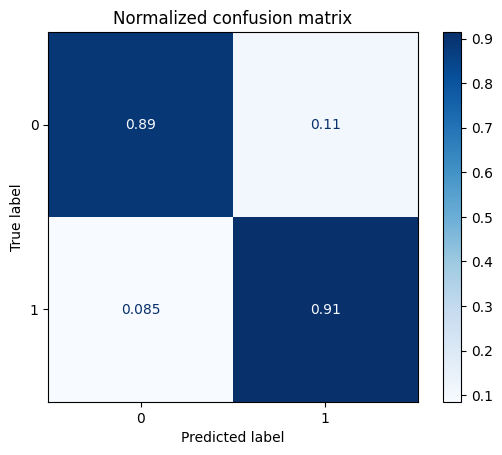

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier ,
        X_kBest_test,
        y_test,

        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


## Visualizar los resultados del set de training